# OpenFEMA Data Analysis: Individual Households Program
This notebook can be used and adapted to work with [**OpenFEMA datasets**](https://www.fema.gov/about/openfema/data-sets) related to the  Individuals and Households Program (IHP). The python functions within the repository can also be adapted to eventually support other available datasets from OpenFEMA (e.g., disaster information, public assistance).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from query import (get_url, get_record_count, get_all_records)

## Demonstration
Example query of a single dataset.
* `name`: Current supporting the following options from the Individuals and Households Programs (IHP)
    * **'HousingAssistanceOwners'**: Housing Assistance Program Data - Owners [V2](https://www.fema.gov/openfema-data-page/housing-assistance-program-data-owners-v2)
    * **'HousingAssistanceRenters'**: Housing Assistance Program Data - Renters [V2](https://www.fema.gov/openfema-data-page/housing-assistance-program-data-renters-v2)
    * **'IndividualsAndHouseholdsProgramValidRegistrations'**: Individuals and Households Program - Valid Registrations [V1](https://www.fema.gov/openfema-data-page/individuals-and-households-program-valid-registrations-v1)
* Additionally, the following options are supported to adjust your query
    * `filters`: Dictionary that filters based on key = value. If multiple keys provided, the filter groups using *AND*. For example, `{'state': 'FL'}` would filter records to only pertain to the state of Florida. If not desired, leave empty as `{}`
    * `filter_str`: String that allows more complex filters (e.g., *OR* operations); see the [API Reference](https://www.fema.gov/about/openfema/api#filter) for guidance on how to construct an appropriate filter string. The start of the string should most likely begin with **"$filter="**. Alternatively, leave empty as `""`
    * `selects`: Reduce the retrieved attributes to a subset of desired attributes. Refer to the relevant dataset documentation (see above links in the `name` section to understand the available attributes). Alternatively, retrieve all attributes by leaving empty as `[]`.

In [2]:
# Select dataset
name = 'HousingAssistanceOwners'

# Add filters and selects
filters = {'disasterNumber': 4407, 'state': 'CA'}
filter_str = ''
selects = []

# Determine url
url = get_url(name, filters=filters, filter_str=filter_str, selects=selects)

# Determine records count
n_records = get_record_count(name, filters=filters, filter_str=filter_str)
print(f"Found {n_records:,.0f} records")

# Retrieve all records
records = get_all_records(url, name, n_records)

# Preview
records.set_index('id').head(5)

Found 118 records


,disasterNumber,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,noFemaInspectedDamage,...,femaInspectedDamageGreaterThan30000,approvedForFemaAssistance,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants
id,,,,,,,,,,,,,,,,,,,,,
eed6464a-bb47-4878-a790-e88490c2f7e7,4407,CA,Butte (County),BERRY CREEK,95916,77,3.22,36,247.98,34,...,0,4,5960.56,0.00,4970.0,0.0,4,0,0,0
921bdab5-7128-4627-8455-5ca1a5b2086a,4407,CA,Butte (County),BIGGS,95917,2,0.00,0,0.00,0,...,0,0,0.00,0.00,0.0,0.0,0,0,0,0
24fcd39f-95a0-4a51-822c-5e4bee39f2fd,4407,CA,Butte (County),BUTTE VALLEY,95965,9,812.56,3,7313.03,2,...,0,1,9785.04,7103.04,2682.0,0.0,0,0,1,0
3081bf75-bc18-4025-97d2-c5307d84b955,4407,CA,Butte (County),CHICO,95926,13,0.00,2,0.00,2,...,0,0,0.00,0.00,0.0,0.0,0,0,0,0
4179e34d-27ba-4eb8-a1a7-662350d1220d,4407,CA,Butte (County),CHICO,95928,338,18489.39,77,6249414.21,16,...,45,43,828063.58,610164.98,68787.0,149111.6,18,5,20,15


## Collect all supported datasets for a given disaster

In this case, we may be interested in multiple datasets pertaining to a specific [disaster declaration number](https://www.fema.gov/disaster/declarations).

For example, `{'disasterNumber': 4339}` would filter data for Hurricane Maria. 

In [3]:
# Dataset names
names = ['HousingAssistanceOwners', 'HousingAssistanceRenters',
         'IndividualsAndHouseholdsProgramValidRegistrations']

# Filter by disaster declaration number
filters = {'disasterNumber': 4339}

# Extract data
data = dict.fromkeys(names)
for name in names:
    url = get_url(name, filters=filters)
    n_records = get_record_count(name, filters=filters, filter_str=filter_str)
    print(f"{name}: found {n_records:,.0f} records")
    data[name] = get_all_records(url, name, n_records)

HousingAssistanceOwners: found 7,520 records
HousingAssistanceRenters: found 4,580 records
IndividualsAndHouseholdsProgramValidRegistrations: found 1,120,768 records
Found >10k records; need to paginate. This may take a few minutes...


In [4]:
# Handle the housing assistance program data
tenures = ['Owners', 'Renters']
for tenure in tenures:
    data[f'HousingAssistance{tenure}']['tenure'] = tenure
program_data = pd.concat([data[f'HousingAssistance{tenure}'] for tenure in tenures], axis=0)

# Arrange some statistics
values = ['validRegistrations', 'totalInspected', 'approvedForFemaAssistance',
        #   'totalInspectedWithNoDamage', 'totalWithModerateDamage', 'totalWithMajorDamage'
         ]
program_stats = program_data.pivot_table(index='county', columns='tenure', values=values, aggfunc='sum')

# Preview total data
program_stats.sum().map('{:,.0f}'.format)

                           tenure 
approvedForFemaAssistance  Owners     328,910
                           Renters    145,212
totalInspected             Owners     536,765
                           Renters    213,547
validRegistrations         Owners     775,223
                           Renters    338,790
dtype: object

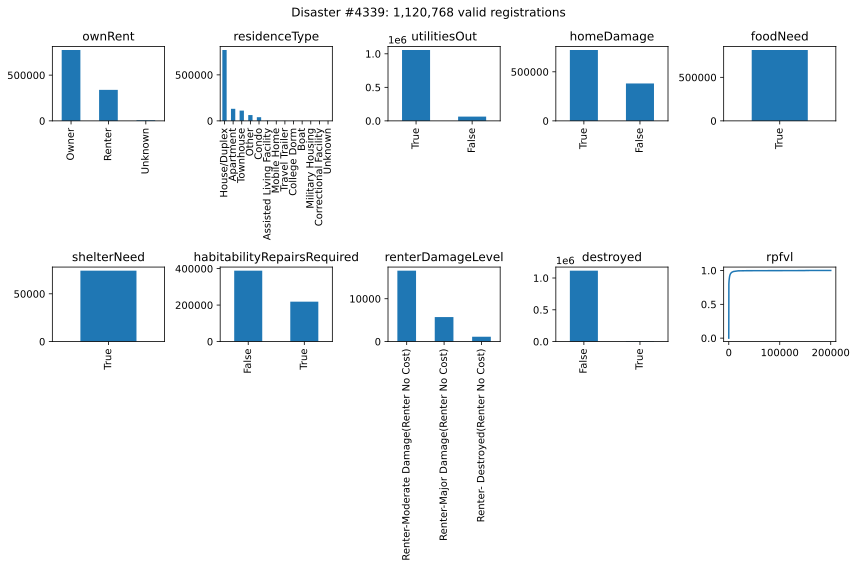

In [5]:
# Handle valid registrations data
registrations = data['IndividualsAndHouseholdsProgramValidRegistrations'].copy()

# Desired features
features = ['ownRent', 'residenceType', 'utilitiesOut', 'homeDamage', 'foodNeed', 'shelterNeed',
           'habitabilityRepairsRequired', 'renterDamageLevel', 'destroyed', 'rpfvl']
n_features = len(features)

# Determine subplots dimensions
def get_subplot_dims(N):
    m = 0
    n = N
    while m + 1 <= n:
        m += 1
        if N % m == 0:
            n = N // m
    return m, n
n_columns, n_rows = get_subplot_dims(n_features)

# Utility function to get empirical CDF
def get_ecdf(df_col):
    n = df_col.shape[0]
    x = np.sort(df_col)
    y = np.arange(1,n+1)/float(n)
    return x, y

# Construct plot - bar plot for qualitative ('object') data; hist plot for quantitative data
fig, axs = plt.subplots(n_rows, n_columns, figsize=(12, n_rows*4))
for i, ax in zip(range(n_features), axs.flatten()):
    feature = features[i]
    if registrations[feature].dtype in ['object', 'bool']:
        registrations[feature].value_counts().plot(kind='bar', ax=ax)
    elif feature == 'rpfvl':
        x, y = get_ecdf(registrations[feature])
        ax.plot(x, y)
    else:
        print(f"{feature} not yet supported")
    ax.set_title(feature)
fig.suptitle(f'Disaster #{filters["disasterNumber"]}: {registrations.shape[0]:,.0f} valid registrations')
fig.tight_layout()
plt.show()

In [6]:
# # Optional code to write out data
# import pickle
# out_path = "data.pkl"
# with open(out_path, 'wb') as f:
#     pickle.dump(data, f)